# 과제2. [평가]Mobile 고객 이탈 분석

* 여러분은 OO 통신화사 데이터분석가 입니다.
* 회사는 약정기간이 끝난 고객이 번호이동(이탈)해 가는 문제를 해결하고자 합니다.
* 그래서 여러분에게, 어떤 고객이 번호이동(이탈)해 가는지 데이터분석을 의뢰하였습니다.
* 고객 이탈여부(CHURN)에 영향을 주는 요인을 찾아 봅시다.

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

### 2) 데이터 로딩

In [2]:
# mobile data
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_NA2.csv"
mobile = pd.read_csv(data_path)
mobile.drop(['id', 'REPORTED_USAGE_LEVEL','OVER_15MINS_CALLS_PER_MONTH'], axis = 1, inplace = True)
mobile.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,5,unsat,considering,0
1,0,74132,191,43,535092.0,349,2,unsat,no,1
2,1,150419,0,14,204004.0,682,6,unsat,considering,0
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0
4,1,23392,0,0,216707.0,233,15,unsat,no,1


|변수 명|내용|구분|
|	----	|	----	|	----	|
|	COLLEGE	|	대학졸업 여부(1,0)	|		|
|	INCOME	|	연 수입액(달러)	|		|
|	OVERAGE	|	월 초과사용 시간(분)	|		|
|	LEFTOVER	|	월 사용 잔여시간(분)	|		|
|	HOUSE	|	집 가격(달러)	|		|
|	HANDSET_PRICE	|	핸드폰 가격(달러)	|		|
|	AVERAGE_CALL_DURATION	|	평균 통화시간(분)	|		|
|	REPORTED_SATISFACTION	|	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' )	|		|
|	CONSIDERING_CHANGE_OF_PLAN	|	변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it')	|		|
|	**CHURN**	|	이탈여부(1 : 이탈, 0 : 잔류)	|	Label	|


----

## 1.가설수립

* 숫자형 최소 3개이상, 범주형 최소 2개 이상씩, 전체 6개의 변수를 도출, 가설을 수립하시오.

* 가설1 : 연 수입액 여부에 따라 이탈 여부에 차이가 있을 것이다.

* 가설2 : 월 초과사용 시간에 따라 이탈 여부에 차이가 있을 것이다.

* 가설3 : 월 사용 잔여시간에 따라 이탈 여부에 차이가 있을 것이다.

* 가설4 : 핸드폰 가격에 따라 이탈 여부에 차이가 있을 것이다.

* 가설5 : 만족도 설문에 따라 이탈 여부에 차이가 있을 것이다.

* 가설6 : 변경 계획 설문에 따라 이탈 여부에 차이가 있을 것이다.

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
④ 기초통계량

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 1) feature1

In [3]:
feature = 'COLLEGE'
target = 'CHURN'

In [4]:
mobile[feature].value_counts()

1    9049
0    8951
Name: COLLEGE, dtype: int64

In [5]:
mobile[feature].isnull().sum()

0

In [6]:
zero_cnt = mobile[feature].value_counts()[0]
one_cnt = mobile[feature].value_counts()[1]
total_cnt = len(mobile[feature])

print('졸업 : ', one_cnt/total_cnt)
print('미졸업 : ', zero_cnt/total_cnt)

졸업 :  0.5027222222222222
미졸업 :  0.49727777777777776


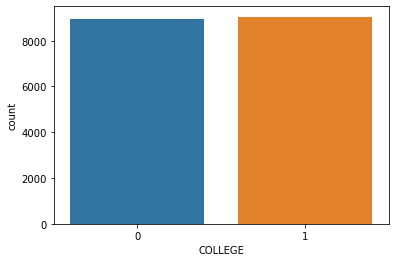

In [7]:
sns.countplot(x=feature, data=mobile)
plt.show()

<AxesSubplot:xlabel='COLLEGE', ylabel='count'>

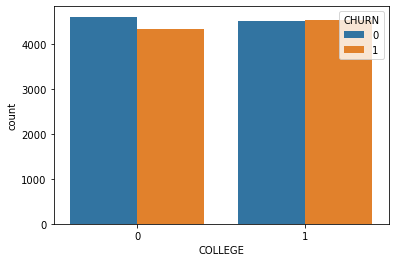

In [8]:
sns.countplot(x=feature, data=mobile, hue=target)

> * 졸업자 50.3%, 미졸업자 49.7%

### 2) feature2

In [10]:
feature = 'INCOME'

> * 숫자형 변수

In [4]:
mobile[feature].head()

0     47711
1     74132
2    150419
3    159567
4     23392
Name: INCOME, dtype: int64

In [5]:
mobile[feature].isna().sum()

0

In [6]:
mobile[feature].describe()

count     18000.000000
mean      80314.400278
std       41703.420130
min       20007.000000
25%       42151.500000
50%       75501.500000
75%      116082.250000
max      159983.000000
Name: INCOME, dtype: float64

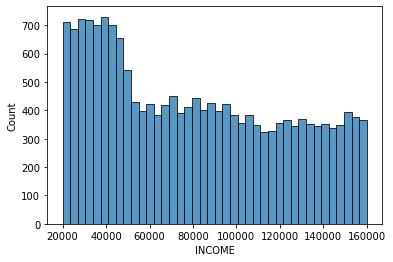

In [8]:
sns.histplot(mobile[feature], bins = 40)
plt.show()

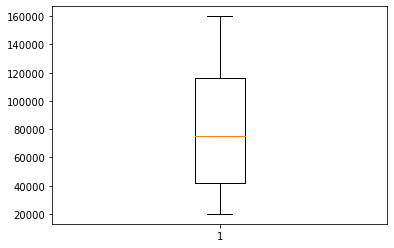

[42151.5 20007. ]
[116082.25 159983.  ]


In [12]:
box = plt.boxplot(mobile[feature])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

> * 연 수입액이 약 2만달러에서 5만 달러까지가 제일 많은 것으로 보아 가입자 중 대학생 혹은 사회 초년생이 많을 것으로 예상한다.
> * 이상치 값이 보이지 않고 데이터가 골고루 분포되어 있음

### 3) feature3

In [15]:
feature = 'OVERAGE'

> * 숫자형 변수

In [16]:
mobile[feature].isna().sum()

0

In [17]:
mobile[feature].describe()

count    18000.000000
mean        86.014833
std         85.963981
min         -2.000000
25%          0.000000
50%         59.000000
75%        179.000000
max        335.000000
Name: OVERAGE, dtype: float64

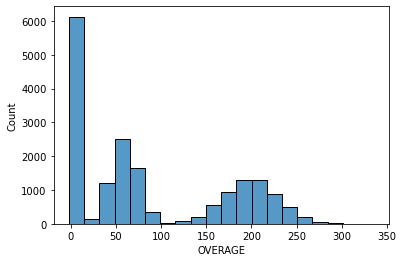

In [18]:
sns.histplot(mobile[feature], bins = 20)
plt.show()

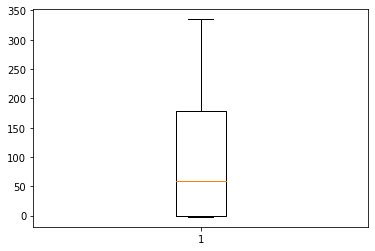

[ 0. -2.]
[179. 335.]


In [19]:
box = plt.boxplot(mobile[feature])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

> * 초과 사용시간이 0분인 고객이 압도적으로 많다.
> * 무제한 요금제를 사용하고 있거나 본인 사용량에 맞는 요금제를 사용하고 있는 것으로 보임

### 4) feature4

In [20]:
feature = 'LEFTOVER'

In [21]:
mobile[feature].isna().sum()

0

In [22]:
mobile[feature].describe()

count    18000.000000
mean        23.995500
std         26.860363
min          0.000000
25%          0.000000
50%         14.500000
75%         42.000000
max         89.000000
Name: LEFTOVER, dtype: float64

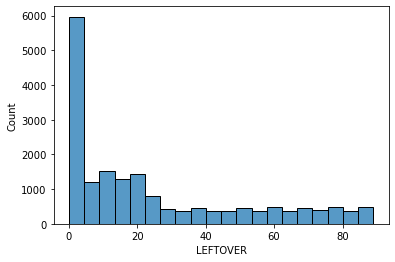

In [23]:
sns.histplot(mobile[feature], bins = 20)
plt.show()

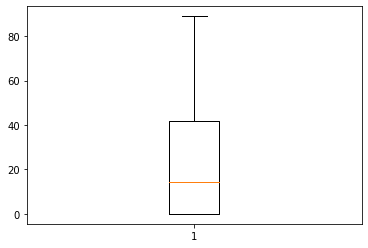

[0. 0.]
[42. 89.]


In [24]:
box = plt.boxplot(mobile[feature])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

> * 월 사용 잔여 시간이 0%인 고객이 압도적으로 많다. 
> * 월 사용 초과 시간이 0분인 고객이 압도적으로 많았던 것을 봤을 때, 주어진 할당량을 한 달에 적절히 나눠 쓰고 있거나, 사용량이 다했을 때 추가로 사용하는 고객이 많이 없다.
> * 추가 요금에 대한 부담때문에 사용하지 않을 가능성도 있다.

### 5) feature5

In [25]:
feature = 'HANDSET_PRICE'

In [26]:
mobile[feature].isna().sum()

0

In [27]:
mobile[feature].count()

18000

In [28]:
mobile[feature].describe()

count    18000.000000
mean       390.096667
std        214.239639
min        130.000000
25%        219.000000
50%        326.000000
75%        536.000000
max        899.000000
Name: HANDSET_PRICE, dtype: float64

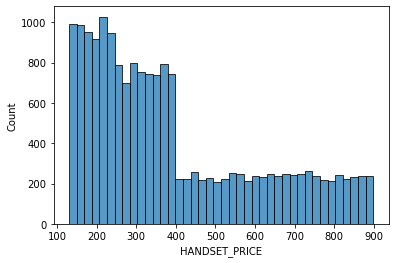

In [29]:
sns.histplot(mobile[feature], bins = 40)
plt.show()

In [13]:
mobile.loc[mobile['HANDSET_PRICE'] < 380]

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,5,unsat,considering,0
1,0,74132,191,43,535092.0,349,2,unsat,no,1
4,1,23392,0,0,216707.0,233,15,unsat,no,1
6,1,99548,235,0,238561.0,294,6,very_unsat,actively_looking_into_it,1
7,1,63338,50,57,394791.0,362,1,sat,no,0
...,...,...,...,...,...,...,...,...,...,...
17991,1,70025,0,0,NaN,331,11,very_sat,no,1
17993,1,72824,53,42,NaN,370,1,very_unsat,considering,1
17994,0,48773,0,0,NaN,231,10,avg,actively_looking_into_it,0
17995,0,31079,200,40,NaN,181,11,unsat,actively_looking_into_it,0


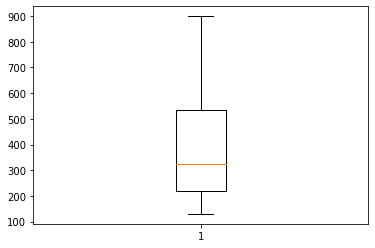

[219. 130.]
[536. 899.]


In [30]:
box = plt.boxplot(mobile[feature])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

> * 150달러에서 약 380달러 가격의 핸드폰을 이용하는 고객이 많다
> * 150 ~ 260, 270 ~ 400, 400이상으로  세 부분으로 나눠서 볼 필요가 있다.
> * 혹은 두 부분으로 150 ~ 400, 400 이상으로 나눠서도 볼 필요가 있음.

### 6) feature6

In [31]:
feature = 'REPORTED_SATISFACTION'

In [32]:
mobile[feature].isna().sum()

38

In [33]:
mobile[feature].count()

17962

> * 현 상황에서는 만족도 조사에 참여하지 않는 고객에게서 만족도가 어떤지 알아볼 방법도 없고, 만족 여부를 임의대로 채우는 것 보다는 17962개의 데이터 중 38개 밖에 되지 않아 제거 후 진행하는 것이 좋다고 판단

In [34]:
mobile.count()

COLLEGE                       18000
INCOME                        18000
OVERAGE                       18000
LEFTOVER                      18000
HOUSE                         17785
HANDSET_PRICE                 18000
AVERAGE_CALL_DURATION         18000
REPORTED_SATISFACTION         17962
CONSIDERING_CHANGE_OF_PLAN    18000
CHURN                         18000
dtype: int64

In [35]:
tmp = mobile.copy()
tmp.dropna(subset=[feature], axis=0, inplace=True)

In [36]:
tmp[feature].isna().sum()

0

In [37]:
print(tmp[feature].value_counts())
print('-' * 40)
print(tmp[feature].value_counts()/ len(tmp[feature]))

very_unsat    7072
very_sat      4562
unsat         3590
avg           1806
sat            932
Name: REPORTED_SATISFACTION, dtype: int64
----------------------------------------
very_unsat    0.393720
very_sat      0.253981
unsat         0.199866
avg           0.100546
sat           0.051887
Name: REPORTED_SATISFACTION, dtype: float64


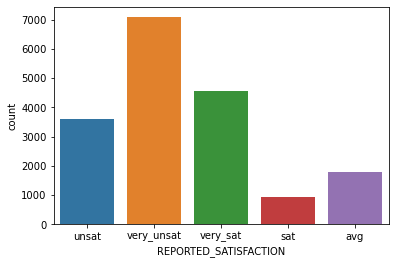

In [38]:
sns.countplot(x=tmp[feature])
plt.show()

> * 불만족 59%, 만족 31%, 중간 10%로 서비스에 불만족하는 고객의 비율이 반이 넘는다.
> * 서비스에 불만족하는 고객들이 많아 이탈율이 높을 것으로 추정

### 7) feature7

In [39]:
feature = 'CONSIDERING_CHANGE_OF_PLAN'

In [40]:
mobile[feature].isna().sum()

0

In [41]:
mobile[feature].count()

18000

In [42]:
print(mobile[feature].value_counts())
print('-' * 40)
print(mobile[feature].value_counts()/ len(mobile[feature]))

considering                 7141
actively_looking_into_it    4453
no                          3644
never_thought               1804
perhaps                      958
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: int64
----------------------------------------
considering                 0.396722
actively_looking_into_it    0.247389
no                          0.202444
never_thought               0.100222
perhaps                     0.053222
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: float64


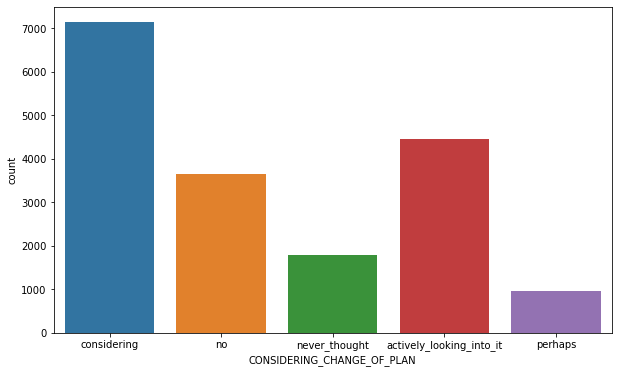

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x=mobile[feature])
plt.show()

> * 고려중인 고객의 비율이 제일 높고 그다음으로 바꿀 계획이 있는 고객이 높다.

### 7) CHURN(target)

In [44]:
target = 'CHURN'

In [45]:
mobile[target].isna().sum()

0

In [46]:
mobile[target].count()

18000

In [47]:
print(mobile[target].value_counts())
print(mobile[target].value_counts()/ len(mobile[target]))

0    9131
1    8869
Name: CHURN, dtype: int64
0    0.507278
1    0.492722
Name: CHURN, dtype: float64


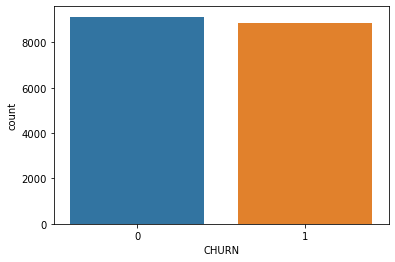

In [48]:
sns.countplot(x=mobile[target])
plt.show()

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [49]:
target = 'CHURN'

### (1) 범주형 Feature --> CHURN
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

#### 1) feature --> CHURN

In [50]:
feature = 'COLLEGE'

In [51]:
pd.crosstab(mobile[target], mobile[feature], normalize = 'columns')

COLLEGE,0,1
CHURN,,
0,0.515697,0.49895
1,0.484303,0.50105


In [52]:
pd.crosstab(mobile[target], mobile[feature], normalize = 'index')

COLLEGE,0,1
CHURN,,
0,0.505531,0.494469
1,0.488781,0.511219


In [53]:
mobile[target].isna().sum()

0

COLLEGE         0         1
CHURN                      
0        0.505531  0.494469
1        0.488781  0.511219


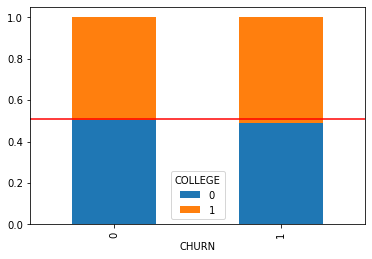

In [54]:
temp = pd.crosstab(mobile[target], mobile[feature], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-mobile[target].mean(), color = 'r')
plt.show()

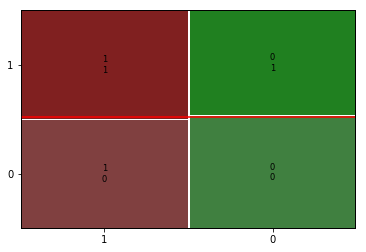

In [55]:
mosaic(mobile, [feature, target])
plt.axhline(1- mobile[target].mean(), color = 'r')
plt.show()

In [56]:
table = pd.crosstab(mobile[target], mobile[feature])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])

카이제곱통계량 4.982102934693503
p-value 0.025610833478220536


> * 대학 졸업 여부에 따라 이탈 여부의 차이가 거의 없다.
> * 졸업자와 미졸업자의 양과 비율 모두 차이가 거의 없다.
> * 자유도는 1이고 카이제곱 통계량은 4.98이며, p값은 5%보다 작다. **아예 관계가 없다고 할 수는 없으나 그 영향은 미미하다.**

#### 2) feature --> CHURN

In [57]:
feature = 'REPORTED_SATISFACTION'

In [58]:
pd.crosstab(tmp[target], tmp[feature], normalize = 'columns')

REPORTED_SATISFACTION,avg,sat,unsat,very_sat,very_unsat
CHURN,,,,,
0,0.527132,0.527897,0.499164,0.511618,0.50099
1,0.472868,0.472103,0.500836,0.488382,0.49901


In [59]:
pd.crosstab(tmp[target], tmp[feature], normalize = 'index')

REPORTED_SATISFACTION,avg,sat,unsat,very_sat,very_unsat
CHURN,,,,,
0,0.104466,0.053989,0.196642,0.256118,0.388785
1,0.096508,0.049723,0.203187,0.251780,0.398802


CHURN                         0         1
REPORTED_SATISFACTION                    
avg                    0.527132  0.472868
sat                    0.527897  0.472103
unsat                  0.499164  0.500836
very_sat               0.511618  0.488382
very_unsat             0.500990  0.499010


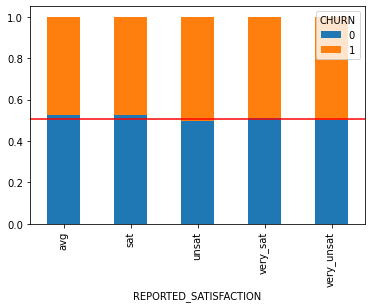

In [60]:
temp = pd.crosstab(tmp[feature], tmp[target], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-tmp[target].mean(), color = 'r')
plt.show()

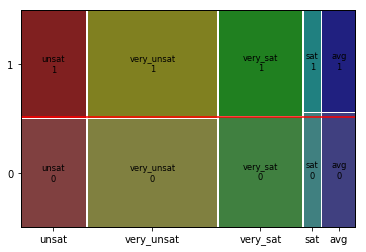

In [61]:
mosaic(tmp, [feature, target])
plt.axhline(1- tmp[target].mean(), color = 'r')
plt.show()

In [62]:
table = pd.crosstab(tmp[target], tmp[feature])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])

카이제곱통계량 6.8411009572056445
p-value 0.14452738878905066


> * 예상과는 달리 만족도 여부에 따라 차이가 보이지 않는다.
> 자유도는 4, 카이제곱 통계량은 6.8이지만 p값은 0.144로 0.05보다 크다. 만족도와 이탈여부는 관계가 없다.

좀 더 명확한 분석을 위해 very_unsat과 unsat, very_sat과 sat을 묶어 세 범주로 나눠서 다시 분석

In [63]:
tmp['satUnsat'] = tmp[feature].map({'very_sat': 'S', 'sat': 'S', 'very_unsat' : 'U', 'unsat' : 'U', 'avg' : 'A'})
tmp.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN,satUnsat
0,1,47711,183,17,730589.0,192,5,unsat,considering,0,U
1,0,74132,191,43,535092.0,349,2,unsat,no,1,U
2,1,150419,0,14,204004.0,682,6,unsat,considering,0,U
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0,U
4,1,23392,0,0,216707.0,233,15,unsat,no,1,U


In [64]:
pd.crosstab(tmp[target], tmp['satUnsat'], normalize = 'columns')

satUnsat,A,S,U
CHURN,,,
0,0.527132,0.514379,0.500375
1,0.472868,0.485621,0.499625


In [65]:
pd.crosstab(tmp[target], tmp['satUnsat'], normalize = 'index')

satUnsat,A,S,U
CHURN,,,
0,0.104466,0.310106,0.585427
1,0.096508,0.301503,0.601989


CHURN            0         1
satUnsat                    
A         0.527132  0.472868
S         0.514379  0.485621
U         0.500375  0.499625


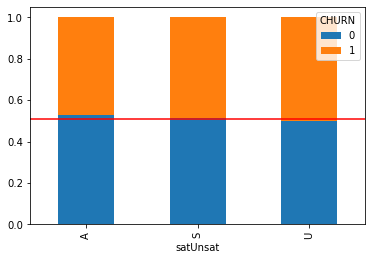

In [66]:
temp = pd.crosstab(tmp['satUnsat'], tmp[target], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-tmp[target].mean(), color = 'r')
plt.show()

In [67]:
table = pd.crosstab(tmp[target], tmp['satUnsat'])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])

카이제곱통계량 5.988800317840202
p-value 0.050066650114634986


> * 이전보다 결과가 좋아진 것은 맞으나 여전히 크게 유의미한 관계는 보이지 않는다.

#### 3) feature --> CHURN

In [68]:
feature = 'CONSIDERING_CHANGE_OF_PLAN'

In [69]:
pd.crosstab(mobile[target], mobile[feature], normalize = 'columns')

CONSIDERING_CHANGE_OF_PLAN,actively_looking_into_it,considering,never_thought,no,perhaps
CHURN,,,,,
0,0.511565,0.510853,0.513304,0.500274,0.475992
1,0.488435,0.489147,0.486696,0.499726,0.524008


In [70]:
pd.crosstab(mobile[target], mobile[feature], normalize = 'index')

CONSIDERING_CHANGE_OF_PLAN,actively_looking_into_it,considering,never_thought,no,perhaps
CHURN,,,,,
0,0.249480,0.399518,0.101413,0.199650,0.049940
1,0.245236,0.393844,0.098997,0.205322,0.056602


CHURN                              0         1
CONSIDERING_CHANGE_OF_PLAN                    
actively_looking_into_it    0.511565  0.488435
considering                 0.510853  0.489147
never_thought               0.513304  0.486696
no                          0.500274  0.499726
perhaps                     0.475992  0.524008


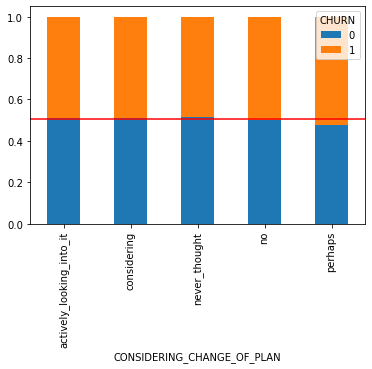

In [71]:
temp = pd.crosstab(mobile[feature], mobile[target], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-mobile[target].mean(), color = 'r')
plt.show()

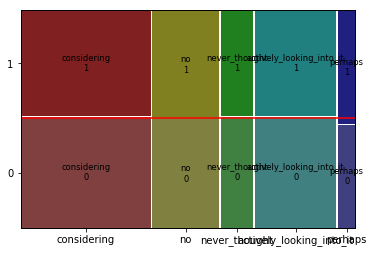

In [72]:
mosaic(mobile, [feature, target])
plt.axhline(1- mobile[target].mean(), color = 'r')
plt.show()

In [73]:
table = pd.crosstab(mobile[target], mobile[feature])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])

카이제곱통계량 5.421434419620689
p-value 0.2467222586679969


> * 자유도는 4, 카이제곱 통계량을 5이며, p값은 0.05보다 작은 값으로 나온다.
> * 변경 계획 응답과 이탈 여부는 관계가 없다.

### (2) 숫자형 Feature --> CHURN

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) feature --> CHURN


In [74]:
feature = 'INCOME'

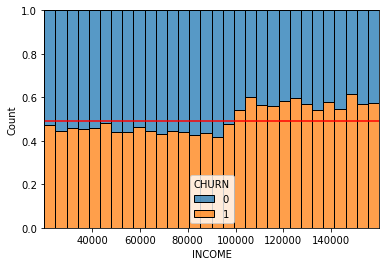

In [75]:
sns.histplot(x=feature, data=mobile, hue = target, multiple = 'fill', bins = 30)
plt.axhline(mobile[target].mean(), color = 'r')
plt.show()

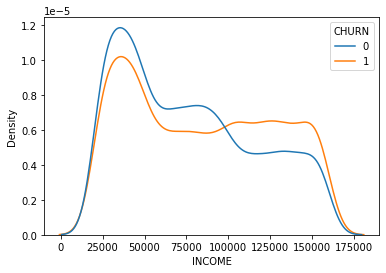

In [76]:
sns.kdeplot(x=feature, data = mobile, hue =target, common_norm=False)
plt.show()

In [77]:
model = sm.Logit(mobile[target], mobile[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692683
         Iterations 2
INCOME    0.000044
dtype: float64


> * 연 수입액이 약 10만 달러가 넘는 고객들의 이탈율이 전체 평균보다 높아진다.
> * p값은 유의수준인 5%보다 작지만 **차이가 많이 나지는 않는다.**

#### 2) feature --> CHURN


In [78]:
feature = 'OVERAGE'

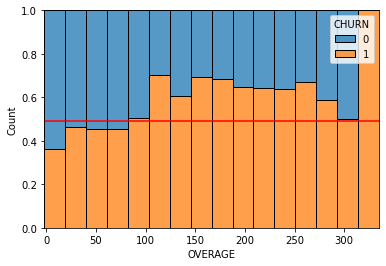

In [79]:
sns.histplot(x=feature, data = mobile, hue = target, multiple = 'fill', bins = 16)
plt.axhline(mobile[target].mean(), color = 'r')
plt.show()

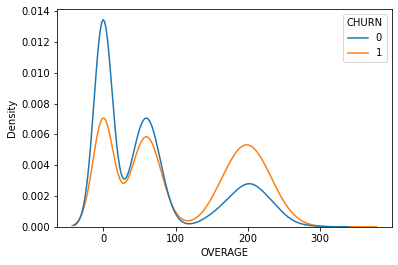

In [80]:
sns.kdeplot(x=feature, data = mobile, hue =target, common_norm=False)
plt.show()

In [81]:
model = sm.Logit(mobile[target], mobile[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.680553
         Iterations 4
OVERAGE    3.521095e-97
dtype: float64


> * 월 초과 사용 시간이 100분이 넘는 지점부터 이탈율이 증가하는 것을 볼 수 있다.
> * 사용량이 많지만 요금제가 비싼 경우, 본인에게 맞는 요금제 없어서 이탈할 가능성도 있어보임
> * p값이 유의수준 5%보다 굉장히 작기 때문에 월 초과 사용량 별 이탈 여부의 유의미한 차이가 있다

#### 3) feature --> CHURN


In [82]:
feature = 'LEFTOVER'

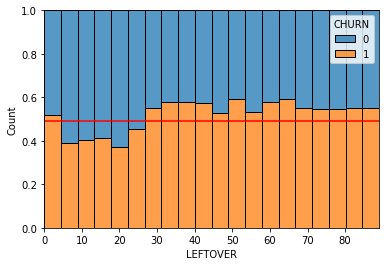

In [83]:
sns.histplot(x=feature, data = mobile, hue = target, multiple = 'fill', bins = 20)
plt.axhline(mobile[target].mean(), color = 'r')
plt.show()

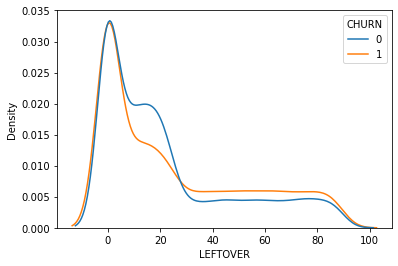

In [84]:
sns.kdeplot(x=feature, data = mobile, hue =target, common_norm=False)
plt.show()

In [85]:
model = sm.Logit(mobile[target], mobile[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692532
         Iterations 3
LEFTOVER    0.000003
dtype: float64


> * 월 사용 잔여시간이 약 6% ~ 28%사이에서는 이탈율이 전체 평균보다 적지만 이후부터는 이탈율이 전체 평균보다 높다.
> * 0% ~ 5%사이에서 이탈율이 전체 평균보다 높은데, 추가 요금에 대한 부담때문에 타사에서 제공하는 더 좋은 조건의 요금제를 이용하기 위해 이탈했을 가능성도 있다.
> * p값이 유의수준 5%보다 작지만 크게 차이는 나지 않기 때문에 월 사용 잔여 시간과 이탈 여부는 약한 관련성이 있다. 

#### 4) feature --> CHURN


In [86]:
feature = 'HANDSET_PRICE'

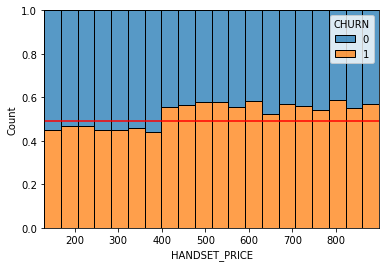

In [87]:
sns.histplot(x=feature, data = mobile, hue = target, multiple = 'fill', bins = 20)
plt.axhline(mobile[target].mean(), color = 'r')
plt.show()

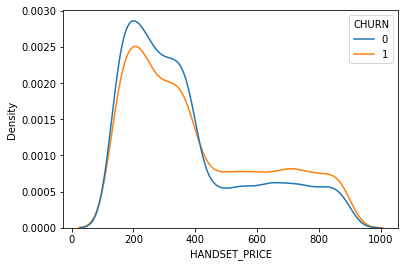

In [88]:
sns.kdeplot(x=feature, data = mobile, hue =target, common_norm=False)
plt.show()

In [89]:
model = sm.Logit(mobile[target], mobile[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692730
         Iterations 3
HANDSET_PRICE    0.000107
dtype: float64


> * 약 400달러 전까지는 전체 평균보다 이탈율이 낮다. 이후부터는 이탈율이 전부 전체 평균보다 높다.
> * p값이 유의수준인 5%보다 작게 나왔지만 크게 차이는 나지 않는 것으로 보아 중간 정도의 관계가 있는 것으로 보인다.

## 4.관계 정리

### 1) 강한관계의 변수

> * OVERAGE

### 2) 약한관계의 변수

> * COLLEGE
> * INCOME
> * LEFTOVER
> * HANDSET_PRICE

### 3) 관계 없음

> * REPORTED_SATISFACTION
> * CONSIDERING_CHANGE_OF_PLAN